https://pythonprogramming.net/preprocessing-for-machine-learning-python-programming-for-finance/?completed=/stock-price-correlation-table-python-programming-for-finance/

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[*********************100%***********************]  1 of 1 downloaded


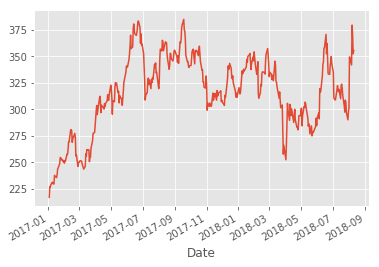

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
from matplotlib import style
import datetime as dt
import numpy as np
import requests
from collections import Counter
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

start = dt.datetime(2017, 1, 1)
end = dt.datetime.now()


df = yf.download('TSLA',start, end)
df.Close.plot()
plt.show()

In [12]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-06  345.459991  354.980011  341.820007  341.989990  341.989990   
2018-08-07  343.839996  387.459991  339.149994  379.570007  379.570007   
2018-08-08  369.089996  382.640015  367.119995  370.339996  370.339996   
2018-08-09  365.549988  367.010010  345.730011  352.450012  352.450012   
2018-08-10  354.000000  360.000000  346.000000  355.489990  355.489990   

              Volume  
Date                  
2018-08-06   8564300  
2018-08-07  30875800  
2018-08-08  24571200  
2018-08-09  17103700  
2018-08-10  11535000  


In [13]:
df.to_csv('TSLA.csv')

In [14]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

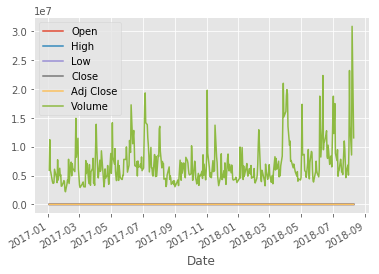

In [15]:
df.plot()
plt.show()

In [16]:
df['100ma'] = df['Close'].rolling(window=100).mean()

In [17]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  214.860001  220.330002  210.960007  216.990005  216.990005   
2017-01-04  214.750000  228.000000  214.309998  226.990005  226.990005   
2017-01-05  226.419998  227.479996  221.949997  226.750000  226.750000   
2017-01-06  226.929993  230.309998  225.449997  229.009995  229.009995   
2017-01-09  228.970001  231.919998  228.000000  231.279999  231.279999   

              Volume  100ma  
Date                         
2017-01-03   5923300    NaN  
2017-01-04  11213500    NaN  
2017-01-05   5911700    NaN  
2017-01-06   5527900    NaN  
2017-01-09   3957000    NaN  


In [18]:
# 100 moving average
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  214.860001  220.330002  210.960007  216.990005  216.990005   
2017-01-04  214.750000  228.000000  214.309998  226.990005  226.990005   
2017-01-05  226.419998  227.479996  221.949997  226.750000  226.750000   
2017-01-06  226.929993  230.309998  225.449997  229.009995  229.009995   
2017-01-09  228.970001  231.919998  228.000000  231.279999  231.279999   

              Volume       100ma  
Date                              
2017-01-03   5923300  216.990005  
2017-01-04  11213500  221.990005  
2017-01-05   5911700  223.576670  
2017-01-06   5527900  224.935001  
2017-01-09   3957000  226.204001  


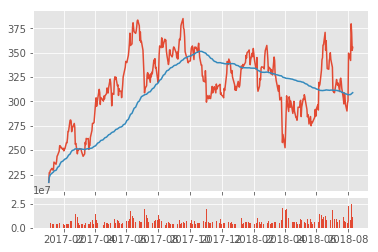

In [19]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [20]:
#making candlestick graphs

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [21]:
# resampling it to 10day data
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [22]:
df_volume = df['Volume'].resample('10D').sum()

In [23]:
print(df_ohlc.head())

                  open        high         low       close
Date                                                      
2017-01-03  216.990005  231.279999  216.990005  229.589996
2017-01-13  237.750000  244.729996  235.580002  244.729996
2017-01-23  248.919998  254.610001  248.919998  249.240005
2017-02-02  251.550003  269.230011  251.330002  269.230011
2017-02-12  280.600006  280.980011  268.950012  277.390015


In [24]:
df_ohlc = df_ohlc.reset_index()

In [25]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

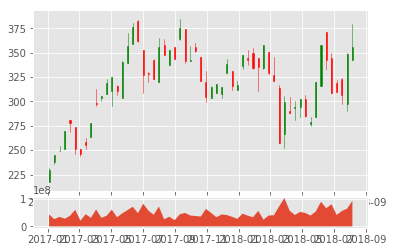

In [26]:
# setup the figure
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

# graph the candlestick graph
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

#do volume
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [27]:
# SP 500
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

In [29]:
# get data
# s&p 500 ticker
import bs4 as bs
import datetime as dt
import os
import pickle
import requests

In [30]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

#save_sp500_tickers()

In [31]:
# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2017, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = yf.download('TSLA',start, end)
            
            #df = web.DataReader(tickers, 'morningstar', start, end)

            #df.reset_index(inplace=True)
            #df.set_index("Date", inplace=True)
            #df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [32]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   ALK         ALB         ARE        ALXN        ALGN  \
Date                                                                     
2017-01-03  216.990005  216.990005  216.990005  216.990005  216.990005   
2017-01-04  226.990005  226.990005  226.990005  226.990005  226.990005   
2017-01-05  226.750000  226.750000  226.750000  226.750000  226.750000   
2017-01-06  229.009995  229.009995  229.009995  229.009995  229.009995   
2017-01-09  231.279999  231.279999  231.279999  231.279999  231.279999   

                  ALLE         AGN         ADS         LNT         ALL  \
Date                                                                     
2017-01-03  216.990005  216.990005  216.990005  216.990005  216.990005   
2017-01-04  226.990005  226.990005  226.990005  226.990005  226.99

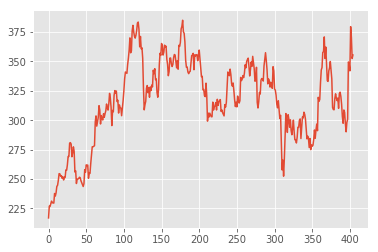

In [33]:
df = pd.read_csv('sp500_joined_closes.csv')
df['AAPL'].plot()
plt.show()

In [34]:
df_corr = df.corr()
print(df_corr.head())

      ALK  ALB  ARE  ALXN  ALGN  ALLE  AGN  ADS  LNT  ALL ...   WYNN  XEL  \
ALK   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALB   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ARE   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALXN  1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALGN  1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   

      XRX  XLNX   XL  XYL  YUM  ZBH  ZION  ZTS  
ALK   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALB   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ARE   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALXN  1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALGN  1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  

[5 rows x 489 columns]


      ALK  ALB  ARE  ALXN  ALGN  ALLE  AGN  ADS  LNT  ALL ...   WYNN  XEL  \
ALK   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALB   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ARE   1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALXN  1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   
ALGN  1.0  1.0  1.0   1.0   1.0   1.0  1.0  1.0  1.0  1.0 ...    1.0  1.0   

      XRX  XLNX   XL  XYL  YUM  ZBH  ZION  ZTS  
ALK   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALB   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ARE   1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALXN  1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  
ALGN  1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0  

[5 rows x 489 columns]


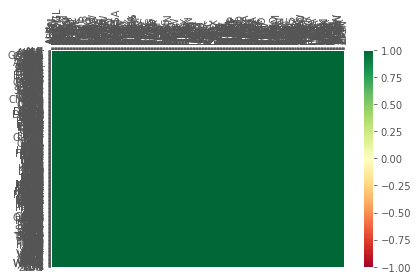

In [37]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')

    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

visualize_data()

In [39]:
# Machine Learning with stock data
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

In [40]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [41]:
from collections import Counter

In [42]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    # classifier is predicting only one class
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    
    # target column will have either a -1, 0, or 1
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    
    # clean up data
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    # convert the stock prices to % changes
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    # capital X contains our featuresets
    # lowercase y is our "target" or our "label"
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df
    
    

In [43]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence

In [48]:
# examples of running:
do_ml('XOM')
do_ml('AAPL')
do_ml('FB')

Data spread: Counter({'1': 221, '-1': 177, '0': 7})


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.5294117647058824
predicted class counts: Counter({1: 65, -1: 37})


Data spread: Counter({'1': 221, '-1': 177, '0': 7})


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.5490196078431373
predicted class counts: Counter({1: 77, -1: 25})


Data spread: Counter({'1': 221, '-1': 177, '0': 7})
accuracy: 0.5686274509803921
predicted class counts: Counter({1: 70, -1: 32})




C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5686274509803921